# Линейная алгебра: сходство текстов и аппроксимация функций

## Сходтство текстов

In [142]:
with open('sentences.txt', 'r') as f:
    content = f.readlines()

In [143]:
content = [x.lower() for x in content]

In [144]:
import re
words = []
for s in content:
    words.append(filter(None, re.split('[^a-z]', s)))

In [145]:
words_dict = {}
for list_of_words in words:
    for w in list_of_words:
        if (words_dict.get(w) == None):
            words_dict[w] = 1
        else:
            words_dict[w] = words_dict[w] + 1


In [146]:
len(words_dict)


256

In [147]:
import numpy as np

matrix = np.zeros((len(content), len(words_dict)), dtype=int)
sorted_dict = sorted(words_dict)

for i, sentence in enumerate(words):
    for j, word in enumerate(sorted_dict):
        number_of_occur = sentence.count(word)
        matrix[i][j] = number_of_occur
            


In [148]:
from scipy.spatial import distance
cosines = []
for s in matrix:
    cosines.append(distance.cosine(matrix[0], s))
coss = cosines[1:]   
print cosines
cos_dict = {}
for i, cos in enumerate(cosines):
    cos_dict[i] = cos

result = []
result.append(min(cos_dict, key=cos_dict.get))
del cos_dict[result[0]]
result.append(min(cos_dict, key=cos_dict.get))
del cos_dict[result[1]]
result.append(min(cos_dict, key=cos_dict.get))
print result


[0.0, 0.95275444087384664, 0.86447381456421235, 0.89517151632780823, 0.77708871496985887, 0.94023856953328033, 0.7327387580875756, 0.92587506833388988, 0.88427248752843102, 0.90550888174769317, 0.83281653622739416, 0.88047713906656067, 0.83964325485254543, 0.87035925528956715, 0.87401184233025764, 0.94427217874246472, 0.84063618542208085, 0.95664450152379399, 0.94427217874246472, 0.88854435748492944, 0.84275727449171223, 0.82503644694405864, 0.22848325018954041]
[0, 22, 6]


## Задача 2: аппроксимация функции


In [98]:
%matplotlib inline

In [149]:
def complicatedFunction(x):
    f = (np.sin(x / 5) * np.exp(x / 10)) + (5 * np.exp(-x / 2))
    return f

In [160]:
print('f(1)=' + str(complicatedFunction(1.)))
print('f(4)=' + str(complicatedFunction(4.)))
print('f(8)=' + str(complicatedFunction(8.)))
print('f(10)=' + str(complicatedFunction(10.)))
print('f(15)=' + str(complicatedFunction(15.)))

f(1)=3.25221686527
f(4)=1.74684594959
f(8)=2.31617015905
f(10)=2.505416407
f(15)=0.635221419579


In [161]:
a = np.array([[1., 1], [1, 15]])
b = np.array([3.25221686527, 0.635221419579])
result = scipy.linalg.solve(a, b)
result

array([ 3.43914511, -0.18692825])

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5]


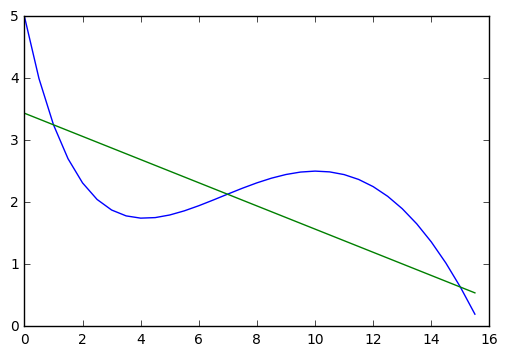

In [166]:
from matplotlib import pylab as plt

x = np.arange(0, 16, 0.5)
print x
f = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
y = -0.18692825 * x + 3.43914511
plt.plot(x, f)
plt.plot(x, y)
plt.show()

In [167]:
a = np.array([[1., 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([3.25221686527, 2.31617015905, 0.635221419579])
result = scipy.linalg.solve(a, b)
result

array([ 3.32512949, -0.06531159, -0.00760104])

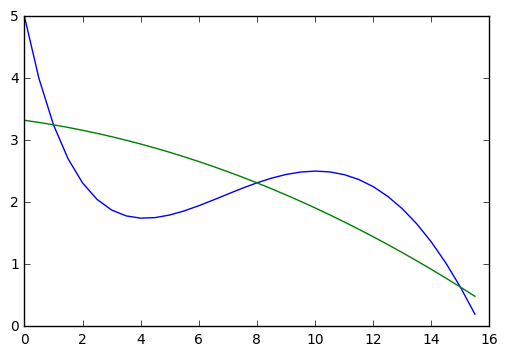

In [168]:
x = np.arange(0, 16, 0.5)
y = -0.00760104 * (x ** 2) -0.06531159 * x + 3.32512949
plt.plot(x, f)
plt.plot(x, y)
plt.show()


In [169]:
a = np.array([[1., 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b = np.array([3.25221686527, 1.74684594959, 2.505416407, 0.635221419579])
result = scipy.linalg.solve(a, b)
result

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

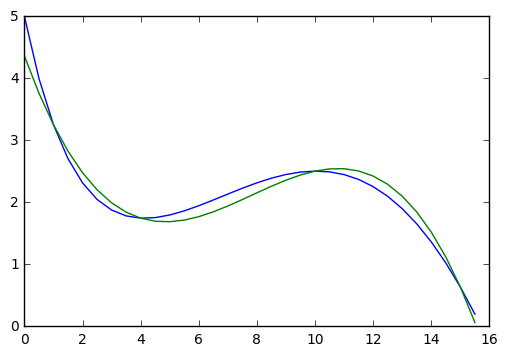

In [170]:
x = np.arange(0, 16, 0.5)
y = -0.00823565 * (x ** 3) + 0.19333685 * (x**2) -1.29552587 * x + 4.36264154

plt.plot(x, f)
plt.plot(x, y)
plt.show()

In [119]:
def complicatedFunction(x):
    f = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
    return f

In [123]:
print('f(1)=' + str(complicatedFunction(1)))
print('f(4)=' + str(complicatedFunction(4)))
print('f(8)=' + str(complicatedFunction(8)))
print('f(10)=' + str(complicatedFunction(10)))
print('f(15)=' + str(complicatedFunction(15)))

f(1)=1.83939720586
f(4)=0.676676416183
f(8)=0.933049179252
f(10)=2.505416407
f(15)=0.385281266681
